## Probability mass function

In [2]:
import pandas as pd
import random

In [3]:
# Roll of a die 10000 times

l = []

for i in range(10000):
    l.append(random.randint(1,6))

In [4]:
len(l)

10000

In [5]:
# Converting list into series
ser = pd.Series(l)
print(ser)

0       3
1       2
2       5
3       5
4       5
       ..
9995    1
9996    2
9997    4
9998    1
9999    6
Length: 10000, dtype: int64


In [10]:
# Probability of every number on a die
prob_value = (ser.value_counts() / ser.value_counts().sum()).sort_index()

<AxesSubplot:>

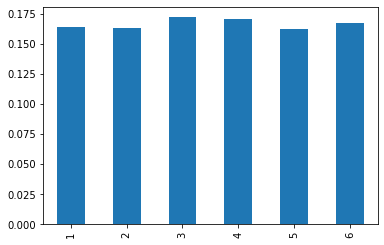

In [14]:
# pmf 
prob_value.plot(kind = 'bar')


In [ ]:
# ROLLING TWO DICE TOGETHER

<AxesSubplot:>

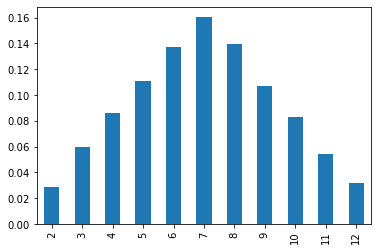

In [17]:
l = []

for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    
    l.append(a+b)  # Adding sum of numbers to the list
    
# Converting list into series
ser = pd.Series(l)
   

# Probability of every number on a die
prob_value = (ser.value_counts() / ser.value_counts().sum()).sort_index()

# pmf 
prob_value.plot(kind = 'bar')


## CUMMULATIVE DISTRIBUTION FUNCTION (CDF)

<AxesSubplot:>

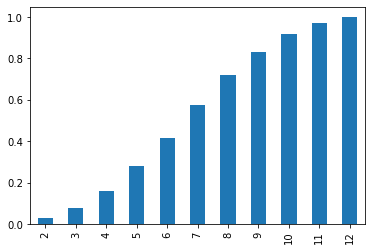

In [18]:
import numpy as np

l = []

for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    
    l.append(a+b)  # Adding sum of numbers to the list
    
# Converting list into series
ser = pd.Series(l)
   

# Probability of every number on a die
prob_value = (ser.value_counts() / ser.value_counts().sum()).sort_index()
cum_prob = np.cumsum(prob_value)

# pmf 
cum_prob.plot(kind = 'bar')

## PROBABILITY DENSITY FUNCTION (PDF)

In [19]:
#PARAMETRIC DENSITY

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal 

#creating a normal distributed random data
sample = normal(loc=50,scale=5,size=1000)

(array([  2.,   3.,  17.,  63., 172., 266., 287., 130.,  47.,  13.]),
 array([28.87988514, 32.41599665, 35.95210816, 39.48821967, 43.02433118,
        46.56044268, 50.09655419, 53.6326657 , 57.16877721, 60.70488872,
        64.24100023]),
 <BarContainer object of 10 artists>)

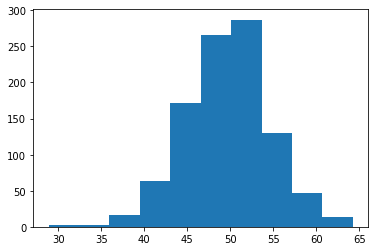

In [21]:
# histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [22]:
# calculate mean and std.dev
sample_mean = sample.mean()
sample_sd = sample.std()

In [23]:
# fit the distribution with above parameters
from scipy.stats import norm
dist = norm(sample_mean,sample_sd)

In [24]:
#Genrating data points between min and max value
values = np.linspace(sample.min(),sample.max(),100)

In [25]:
# pdf
prob = [dist.pdf(value) for value in values]

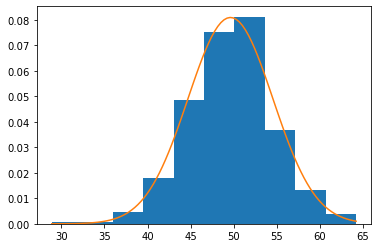

In [26]:
# plot the original histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,prob)


### KERNEL DENSITY ESTIMATION (KDE)

In [27]:
# generate a sample
samp1 = normal(loc=20,scale=5,size=300)
samp2 = normal(loc=40,scale=5,size=700)
sample = np.hstack((samp1,samp2))

In [28]:
sample

array([17.63452679, 24.83759418, 18.86280943, 15.03613984, 21.4375332 ,
       17.53612106, 13.53059373, 18.76983485, 19.70187717, 23.20748432,
       22.07421995, 21.87272835, 17.00552022, 21.10849381, 14.15367636,
       25.80236341, 23.19681469, 22.55047058, 20.91033722, 22.47031816,
       19.47094945, 19.60181962, 24.03392111, 19.5193949 , 21.59072918,
       26.13079314, 17.63521673, 21.53071009, 24.76536342, 21.84258188,
       21.13122058, 23.36669799, 12.83667673,  9.50179658, 15.70008629,
       21.27767599, 28.24967377, 19.29074106, 12.92785664, 17.39095075,
       23.81409896, 18.04160708, 18.54743019, 10.75827228, 25.14418593,
       15.2932839 , 32.74376242, 15.39769465, 19.31818075, 27.24020845,
       19.78806496, 18.81699459, 21.19256178, 21.90755409,  7.84219457,
       14.81050132, 17.85695553, 22.72089931, 13.33609819, 18.90956299,
       18.00098982, 24.17599741, 25.08367146, 16.5303771 , 18.19887711,
       24.06782878,  7.51202404, 19.05221076, 24.22731053, 17.36

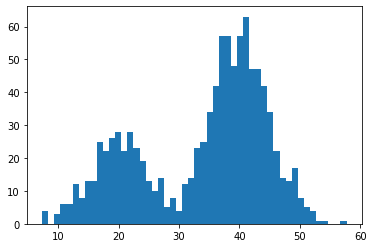

In [31]:
# plot histogram
plt.hist(sample,bins=50)
plt.show()

In [32]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth = 3 , kernel = 'gaussian')

#convert data to 2d array
sample = sample.reshape(len(sample),1)
model.fit(sample)

KernelDensity(bandwidth=3)

In [33]:
# Genrating random values between min and max
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape(len(values),1)

In [34]:
prob = model.score_samples(values)
prob = np.exp(prob) #score_sample values are log values so take exponent to get actual estimate

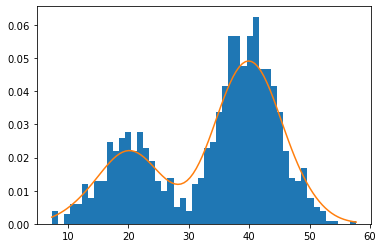

In [35]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],prob)
plt.show()

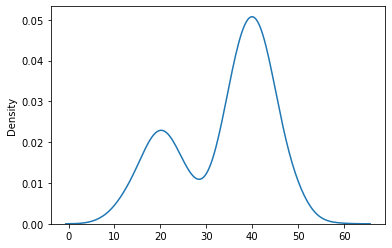

In [43]:
import seaborn as sns
sns.kdeplot(sample.reshape(1000))
plt.show()